In [1]:
# import necessary python packages 

import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
from datetime import date
import matplotlib.pyplot as plt

# Part 1 Data Acqusition
Read the data from the crawled csv file and display the dataframe general view

In [ ]:
# Read data from a CSV file into a data frame
df = pd.read_csv('zillow.csv')

# Display the first five rows of the data frame to examine if it is an individual-level data set
print(df.head())

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

                                              h_link  ...      lot
0  https://www.zillow.com/homedetails/34-Joyce-Ln...  ...  10890.0
1  https://www.zillow.com/homedetails/61-Cypress-...  ...  11326.0
2  https://www.zillow.com/homedetails/69-Walter-A...  ...  11326.0
3  https://www.zillow.com/homedetails/6-Park-Ct-P...  ...  11326.0
4  https://www.zillow.com/homedetails/6-Lesley-Ln...  ...  11326.0

[5 rows x 18 columns]
['h_link' 'num_of_bed' 'num_of_bath' 'square' 'price' 'zestimate' 'year'
 'month' 'date' 'town' 'state' 'zipcode' 'house_type' 'year_built'
 'heating' 'cooling' 'parking' 'lot']
(659, 18)


In [ ]:
#show all the attributes' data types
df.dtypes

h_link          object
num_of_bed     float64
num_of_bath    float64
square         float64
price            int64
zestimate      float64
year             int64
month            int64
date             int64
town            object
state           object
zipcode          int64
house_type      object
year_built     float64
heating         object
cooling         object
parking         object
lot            float64
dtype: object

# Part 2 Data Cleaning
Impute missing / NA values and convert the attribute' data type into properly ones

In [ ]:
#check total counts of missing values of each attribute
df.isnull().sum()

h_link           0
num_of_bed      29
num_of_bath     12
square         267
price            0
zestimate       58
year             0
month            0
date             0
town             0
state            0
zipcode          0
house_type       0
year_built       9
heating         15
cooling         41
parking          0
lot             20
dtype: int64

In [ ]:
# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'price'
df1 = df.copy()
df1 = df1.dropna(subset=[DV])
df1.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6.0,3.0,3299.0,1080000,1096500.0,2021,10,13,Woodbury,NY,11797,Single Family Residence,1967.0,Natural Gas,Central Air,2 Attached Garage spaces,10890.0
1,https://www.zillow.com/homedetails/61-Cypress-...,3.0,2.0,NaN,555000,561800.0,2021,10,21,Bethpage,NY,11714,Single Family Residence,1956.0,Natural Gas,Central Air,1 Attached Garage space,11326.0
2,https://www.zillow.com/homedetails/69-Walter-A...,6.0,4.0,2663.0,875000,NaN,2021,11,15,Hicksville,NY,11801,Single Family Residence,1981.0,Natural Gas,Wall Unit(s),1 Attached Garage space,11326.0
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5.0,3.0,3662.0,1350000,1360000.0,2021,11,10,Plainview,NY,11803,Single Family Residence,2021.0,Natural Gas,Central Air,2 Attached Garage spaces,11326.0
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,NaN,1.5,1592.0,560000,641300.0,2021,11,9,Bethpage,NY,11804,SingleFamily,1957.0,Other,Central,Garage - Attached,11326.0


In [ ]:
df2 = df1.copy()

In [ ]:
#df2['price'] = df2['price'].astype(str).str.replace('$', '').str.replace(',', '')
#df2['price'] = pd.to_numeric(df2['price'], errors='coerce').fillna(df2['price'].median(), inplace=True)
df2['price'] = df2['price'].astype('int64')

In [ ]:
#df2['year_built'] = df2['year_built'].str.replace('Build in ', '')
df2['year_built'] = pd.to_numeric(df2['year_built'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['square'] = df2['square'].str.replace(',', '').str.replace('sqft', '')
df2['square'] = pd.to_numeric(df2['square'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bed'] = df1['num_of_bed'].str.replace('bd', '')
df2['num_of_bed'] = pd.to_numeric(df2['num_of_bed'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bath'] = df1['num_of_bath'].str.replace('ba', '')
df2['num_of_bath'] = pd.to_numeric(df2['num_of_bath'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['lot'] = df1['lot'].str.replace(',', '').str.replace('sqft', '')
df2['lot'] = pd.to_numeric(df2['lot'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['zestimate'] = df2['zestimate'].str.replace('$', '').str.replace(',','')
df2['zestimate'] = pd.to_numeric(df2['zestimate'], errors='coerce').fillna(0).astype(int)

In [ ]:
df2.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6,3,3299,1080000,1096500,2021,10,13,Woodbury,NY,11797,Single Family Residence,1967,Natural Gas,Central Air,2 Attached Garage spaces,10890
1,https://www.zillow.com/homedetails/61-Cypress-...,3,2,0,555000,561800,2021,10,21,Bethpage,NY,11714,Single Family Residence,1956,Natural Gas,Central Air,1 Attached Garage space,11326
2,https://www.zillow.com/homedetails/69-Walter-A...,6,4,2663,875000,0,2021,11,15,Hicksville,NY,11801,Single Family Residence,1981,Natural Gas,Wall Unit(s),1 Attached Garage space,11326
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5,3,3662,1350000,1360000,2021,11,10,Plainview,NY,11803,Single Family Residence,2021,Natural Gas,Central Air,2 Attached Garage spaces,11326
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,0,1,1592,560000,641300,2021,11,9,Bethpage,NY,11804,SingleFamily,1957,Other,Central,Garage - Attached,11326


In [ ]:
df2.dtypes

h_link         object
num_of_bed      int64
num_of_bath     int64
square          int64
price           int64
zestimate       int64
year            int64
month           int64
date            int64
town           object
state          object
zipcode         int64
house_type     object
year_built      int64
heating        object
cooling        object
parking        object
lot             int64
dtype: object

In [ ]:
#seperate numerical variable and categorical variabl
nvar_list = ['num_of_bed', 'num_of_bath', 'square', 'zestimate', 'year_built', 'lot', 'price']
#cvar_list = ['h_link', 'sold_type', 'month', 'date','year', 'address', 'town', 'state', 'zipcode',  'house_type', 'heating', 'cooling',  'parking' ]


# Part 3 Data Exploration
Explore the relationships among independent varialbes and dependent variable

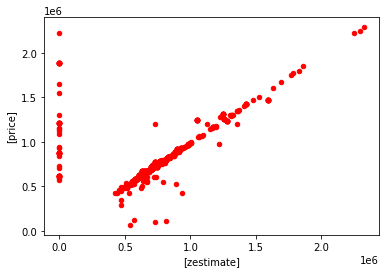

In [ ]:
# Generate a scatterplot based on KM and Price

# A good programing practice: 
# We use a set of placeholder variables with pre-determined variable names (e.g., x_var, y_var) to carry problem-specific (or dataset-specific) parameter values (e.g., KM and Price). 
# Then we use those placeholder variables as the argument values for a method or an operation. 
# By doing this, later, we just need to change the values of those placeholder variables when we have a different problem (or dataset). 

# Placeholder variables: x_var, y_var. 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = [ 'zestimate']
y_var = [ 'price']

# Draw the scatterplot
df2.plot.scatter(x=x_var, y=y_var, color = ['red'], legend=False)

In [ ]:
df3 = df2.copy()
df3 = df3[nvar_list]

             num_of_bed  num_of_bath    square  ...  year_built       lot     price
num_of_bed     1.000000     0.649503  0.367229  ...    0.364596  0.278794  0.461923
num_of_bath    0.649503     1.000000  0.456109  ...    0.332559  0.406063  0.598618
square         0.367229     0.456109  1.000000  ...    0.158995  0.415581  0.567370
zestimate      0.300562     0.415384  0.382397  ...    0.108764  0.331558  0.455897
year_built     0.364596     0.332559  0.158995  ...    1.000000 -0.066472 -0.120319
lot            0.278794     0.406063  0.415581  ...   -0.066472  1.000000  0.623178
price          0.461923     0.598618  0.567370  ...   -0.120319  0.623178  1.000000

[7 rows x 7 columns]


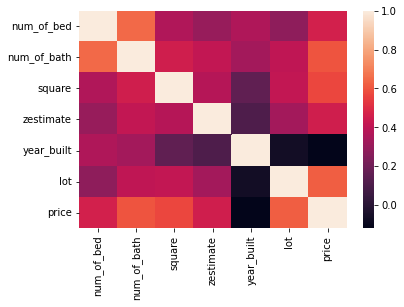

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
df4heatmaps = df3

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Part 4 Association Transformation

In [ ]:
# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 

#drop variables 
drop_list = ['h_link',  'zipcode',  'month', 'date','year', 'state']
df4 = df2.copy()
df4 = df4.drop(columns = drop_list)

In [ ]:
import numpy as np
df5 = df4.copy()

In [ ]:
cvar_list = [ 'house_type', 'town', 'heating', 'cooling',  'parking']
df5 = df4[cvar_list].copy()


In [ ]:
#define conditions
conditions = [df4['price'] > df4['zestimate'], 
              df4['price'] < df4['zestimate']]

#define choices
choices = ['1', '0']

#create new column in DataFrame that displays results of comparisons
df5['class'] = np.select(conditions, choices, default='0')
df5['class'] = df5['class'].astype('category')

In [ ]:
# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
df6 = df5.copy()
df6 = pd.get_dummies(df6, prefix_sep='_')

In [ ]:
df6 = df6.astype('category')


In [ ]:
df6.dtypes

house_type_Multi Family               category
house_type_MultiFamily                category
house_type_Single Family Residence    category
house_type_SingleFamily               category
house_type_Townhouse                  category
house_type_Unknown                    category
town_Bethpage                         category
town_Hicksville                       category
town_Huntington                       category
town_Jericho                          category
town_Melville                         category
town_Plainview                        category
town_Syosset                          category
town_Woodbury                         category
heating_Baseboard                     category
heating_Electric                      category
heating_Forced air                    category
heating_Hot Water                     category
heating_Natural Gas                   category
heating_Oil                           category
heating_Other                         category
heating_Propa

In [ ]:
df7 = df6.copy()

In [ ]:
# Get the remaining variable list after the variable transformation
print(df7.columns.values)

['house_type_Multi Family' 'house_type_MultiFamily'
 'house_type_Single Family Residence' 'house_type_SingleFamily'
 'house_type_Townhouse' 'house_type_Unknown' 'town_Bethpage'
 'town_Hicksville' 'town_Huntington' 'town_Jericho' 'town_Melville'
 'town_Plainview' 'town_Syosset' 'town_Woodbury' 'heating_Baseboard'
 'heating_Electric' 'heating_Forced air' 'heating_Hot Water'
 'heating_Natural Gas' 'heating_Oil' 'heating_Other' 'heating_Propane'
 'cooling_Central' 'cooling_Central Air' 'cooling_Ductless' 'cooling_None'
 'cooling_Other' 'cooling_Wall' 'cooling_Wall Unit(s)'
 'cooling_Window Unit(s)' 'cooling_Zoned' 'parking_0 spaces'
 'parking_1 Attached Garage space' 'parking_1 Garage space'
 'parking_1 Parking space' 'parking_2 Attached Garage spaces'
 'parking_2 Garage spaces' 'parking_2 Parking spaces'
 'parking_3 Attached Garage spaces' 'parking_3 Garage spaces'
 'parking_3 Parking spaces' 'parking_4 Attached Garage spaces'
 'parking_4 Garage spaces' 'parking_4 Parking spaces'
 'parkin

In [ ]:
# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['house_type_Multi Family', 'heating_Baseboard', 'cooling_Central', 'parking_0 spaces', 'class_1']
df8 = df7.copy()
df8 = df7.drop(columns=rdummies)

In [ ]:
df8 = df8.astype('int64')

[0.00012739 0.01787399 0.00866445 0.00275989 0.02794763 0.03595518
 0.06143666 0.00260815 0.05697379 0.00612259 0.03969938 0.05023773
 0.01015141 0.00093824 0.00584796 0.00525791 0.05931929 0.04790895
 0.03716169 0.00049234 0.0940992  0.06832243 0.02814789 0.0004003
 0.00163711 0.04995784 0.01147824 0.00243967 0.05033848 0.02620046
 0.00194498 0.0423461  0.01174283 0.00081978 0.00086032 0.02311261
 0.00522446 0.00598976 0.00388213 0.0084262  0.0003114  0.00056027
 0.00287544 0.00421596 0.00137052 0.00058825 0.07511824 0.00010451]


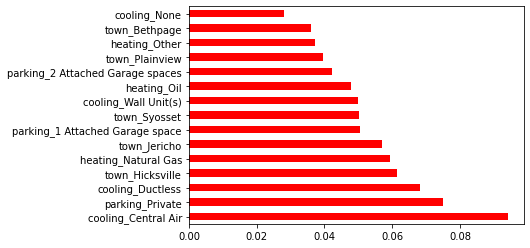

In [ ]:

DV = 'class_0'
y = df8[DV]
X = df8.drop(columns=[DV])
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color = 'red')
plt.show()

                                    house_type_MultiFamily  ...   class_0
house_type_MultiFamily                            1.000000  ...  0.023715
house_type_Single Family Residence               -0.099303  ... -0.007730
house_type_SingleFamily                          -0.013115  ...  0.125492
house_type_Townhouse                             -0.002636  ... -0.009630
house_type_Unknown                               -0.003409  ... -0.143734
town_Bethpage                                    -0.012111  ... -0.076404
town_Hicksville                                   0.091099  ... -0.136527
town_Huntington                                  -0.004039  ... -0.003642
town_Jericho                                     -0.005079  ... -0.187500
town_Melville                                    -0.004039  ...  0.029695
town_Plainview                                   -0.039162  ...  0.071121
town_Syosset                                     -0.016489  ...  0.142987
town_Woodbury                         

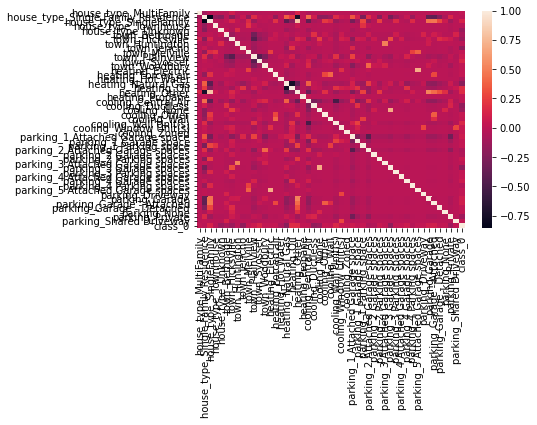

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
df4heatmaps = df8

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)